In [1]:
import numpy as np

In [7]:
X = np.linspace(1,10,10000)
y = 2*X + 5

In [17]:
from sklearn.linear_model import LinearRegression as lr

In [18]:
model = lr()

In [20]:
model.fit(X.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
model.coef_

(1,)

In [22]:
model.intercept_

5.000000000000007

In [24]:
model.predict(1.5)

array([8.])

In [26]:
model.score()

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

## House price prediction problem

In [49]:
import pandas as pd

In [96]:
df = pd.read_csv('data/house_rental_data.csv',index_col='Unnamed: 0')
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [128]:
# see the list of columns in a dataframe
df.columns
#df1 = df[['Sqft','Price']]
#df1.head()

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

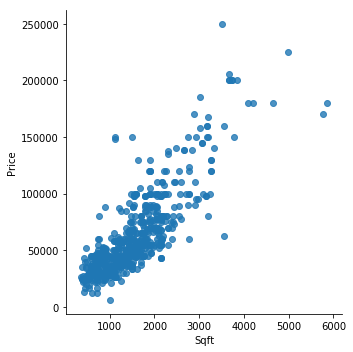

In [79]:
import seaborn as sns
#sns.distplot(df.Sqft)
sns.lmplot(data=df1,x='Sqft',y='Price',fit_reg=False)

In [85]:
# import package from scikit learn for doing linear regression
from sklearn.linear_model import LinearRegression

In [86]:
# instantiate a new object of the class
model = LinearRegression()

In [143]:
# split the data into train and test
from sklearn.model_selection import train_test_split
#feature_set = df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']]
feature_set = df[['Sqft']]
trainX,testX,trainy,testy = train_test_split(feature_set,df.Price)

In [144]:
# build the model using the training datasets
model.fit(trainX,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [145]:
# print the intercept value of the best fit line => theta0
model.intercept_

2813.098547613372

In [146]:
# print the coefficient value of the best fit line => theta1
model.coef_

array([39.22258608])

In [147]:
# print the r^2 value of the model
model.score(testX,testy)

0.6580492058146301

In [148]:
# print the list of predicted y values by feeding in the test data
pred_y = model.predict(testX.values.reshape(-1,1))

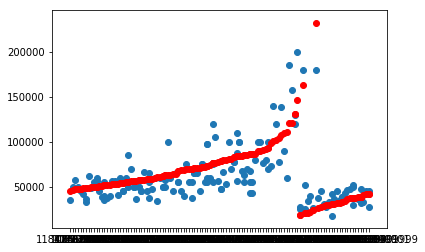

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(testX,testy)
plt.scatter(testX,pred_y,color='r')